In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

In [2]:
m0_scale    = 14
m0_min      = 2.4
m0_max      = 16
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# U to 2tau validation sample

In [3]:
bin_width=0.4

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch30_val_pseudoscalar_mae1.8924_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch30_val_pseudoscalar_mae1.9605_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch30_val_pseudoscalar_mae1.9682_inference_data.pkl


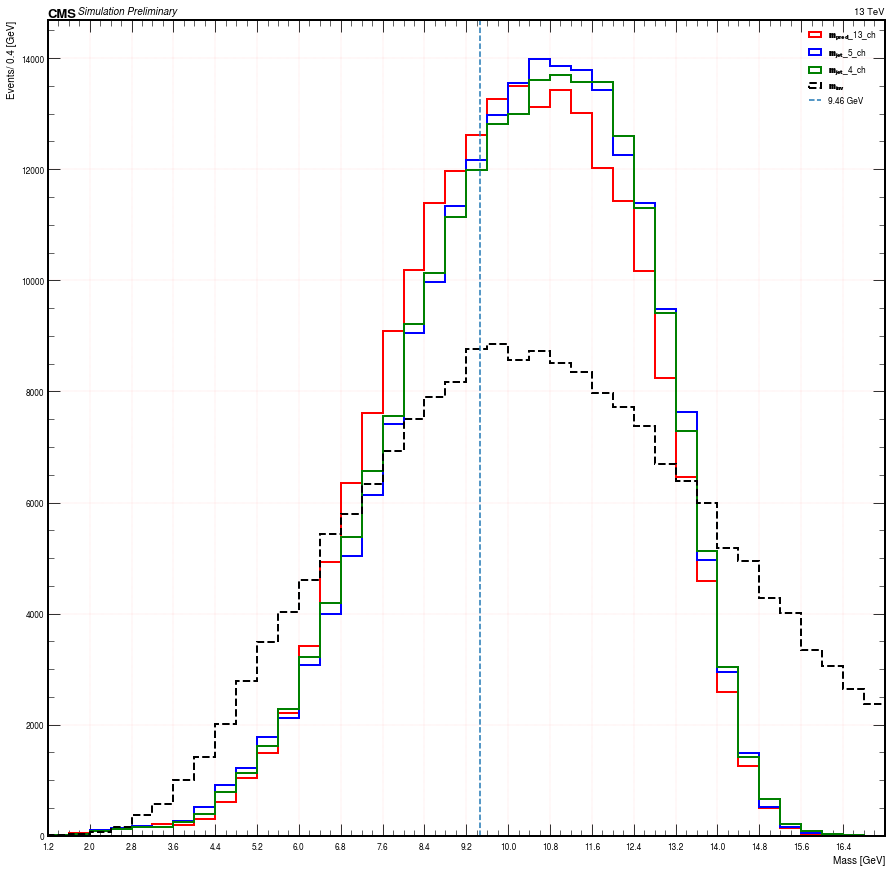

In [4]:
 
data_file1 = glob.glob(f"/global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/*U*/*")[0]
infile1 = open(f"{data_file1}", "rb")
data1 = pickle.load(infile1)
print(f"loaded data file 1 ------>  {data_file1}")
infile1.close()
m_true_u1 = data1["m_true"]
m_pred_u1 = data1["m_pred"]
jet_massu1 = data1["m0"]

data_file2 = glob.glob(f"/global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/*U*/*")[0]
infile2 = open(f"{data_file2}", "rb")
data2 = pickle.load(infile2)
print(f"loaded data file 2 ------>  {data_file2}")
infile2.close()
m_pred_u2 = data2["m_pred"]

data_file3 = glob.glob(f"/global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/*U*/*")[0]
infile3 = open(f"{data_file3}", "rb")
data3 = pickle.load(infile3)
print(f"loaded data file 3 ------>  {data_file3}")
infile2.close()
m_pred_u3 = data3["m_pred"]

# Check 1D m_pred
# Extebded version
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(m_pred_u1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%'13_ch', linestyle='-', color='red', linewidth=2)

plt.hist(m_pred_u2, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'5_ch', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_u3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'4_ch', linestyle='-', color='green', linewidth=2)
plt.hist(jet_massu1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{inv}}$', linestyle='--', color='black', linewidth=2)

plt.axvline(x= 9.46,linestyle='--',label=f'9.46 GeV')
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8))
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


In [7]:
def plot_3_model_for_massreg(mass='3p7'):   
    data_file1 = glob.glob(f"/global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    mass_ = {'3p7': 3.7, '4': 4, '5': 5,'6':6, '8':8, '10':10, '12':12, '14':14}.get(mass, None)
    infile1 = open(f"{data_file1}", "rb")
    data1 = pickle.load(infile1)
    print(f"loaded data file 1 ------>  {data_file1}")
    infile1.close()
    m_true_u1 = data1["m_true"]
    m_pred_u1 = data1["m_pred"]
    jet_massu1 = data1["m0"]

    data_file2 = glob.glob(f"/global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    infile2 = open(f"{data_file2}", "rb")
    data2 = pickle.load(infile2)
    print(f"loaded data file 2 ------>  {data_file2}")
    infile2.close()
    m_pred_u2 = data2["m_pred"]
    
    data_file3 = glob.glob(f"/global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/*M_{mass}*/*")[0]
    infile3 = open(f"{data_file3}", "rb")
    data3 = pickle.load(infile3)
    print(f"loaded data file 3 ------>  {data_file3}")
    infile3.close()
    m_pred_u3 = data3["m_pred"]


    # Check 1D m_pred
    # Extebded version
    fig, ax = plt.subplots(figsize=(15,15))
    plt.hist(m_pred_u1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{pred}}$_%s'%'13_ch', linestyle='-', color='red', linewidth=2)

    plt.hist(m_pred_u2, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'5_ch', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_u3, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{jet}}$_%s'%'4_ch', linestyle='-', color='green', linewidth=2)
    plt.hist(jet_massu1, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{inv}}$', linestyle='--', color='black', linewidth=2)

    plt.axvline(x= mass_,linestyle='--',label=f'{mass_} GeV')
    plt.xlim(m0_min-1.2,m0_max+1.2)
    plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8))
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()


# Signal Mass = 3.7 GeV

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.4559_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.7341_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.8918_inference_data.pkl


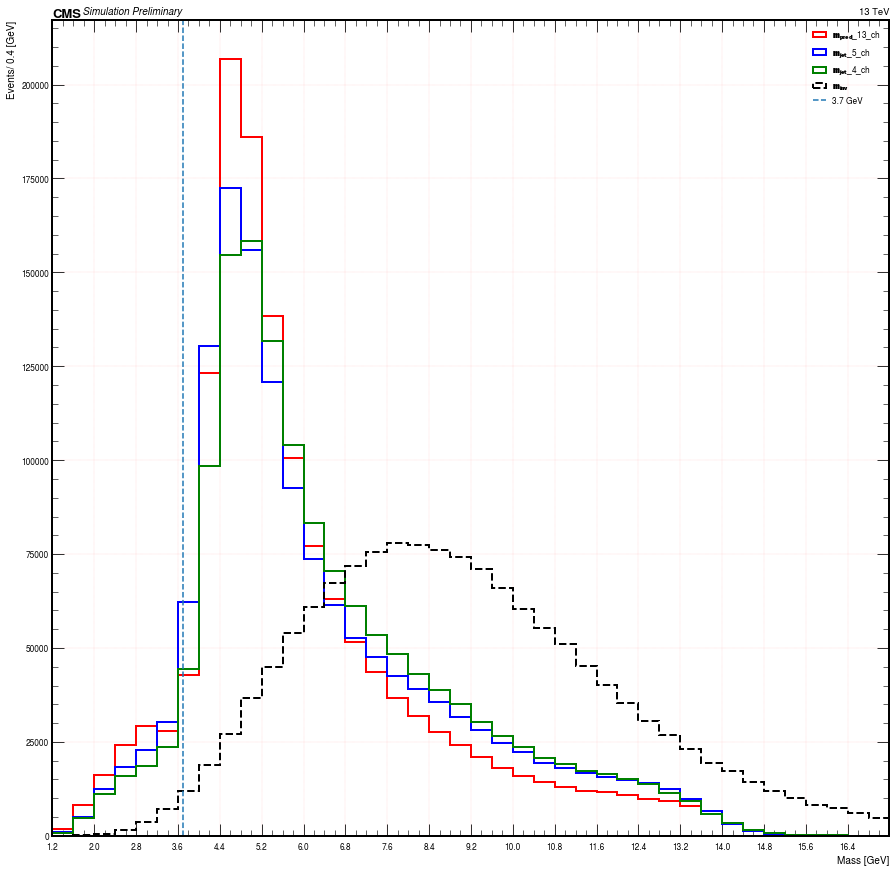

In [8]:
plot_3_model_for_massreg(mass='3p7')

# Signal Mass = 4 GeV

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.2577_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.5268_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.6736_inference_data.pkl


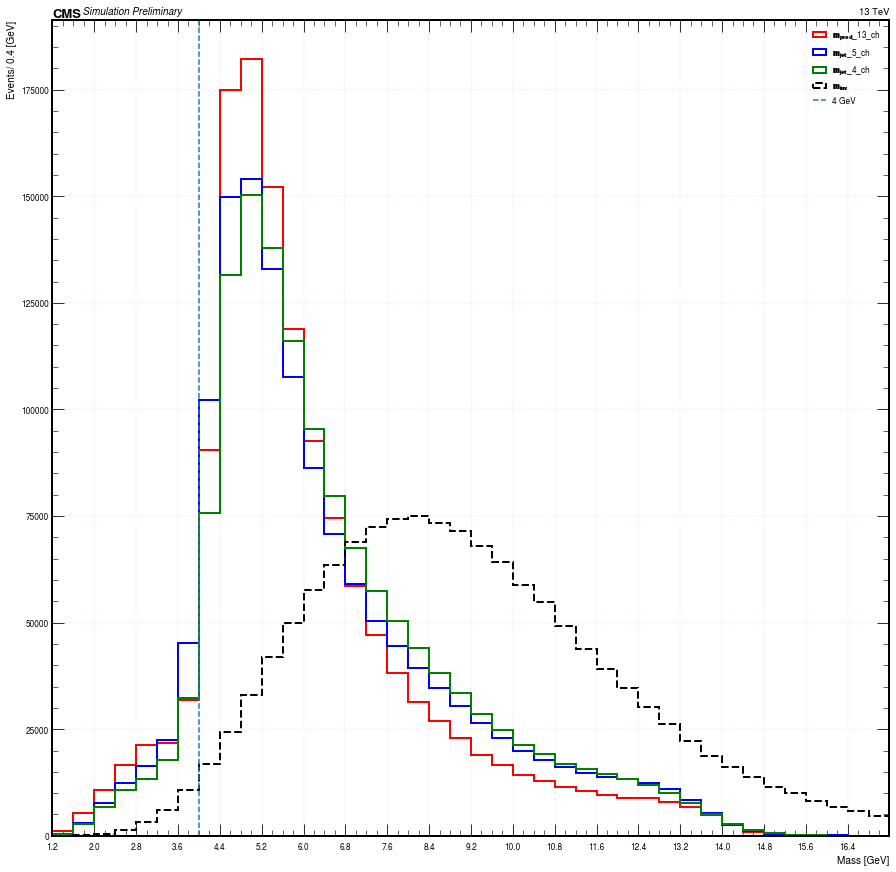

In [9]:
plot_3_model_for_massreg(mass='4')

# Signal Mass = 5 GeV

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9237_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.1619_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.2686_inference_data.pkl


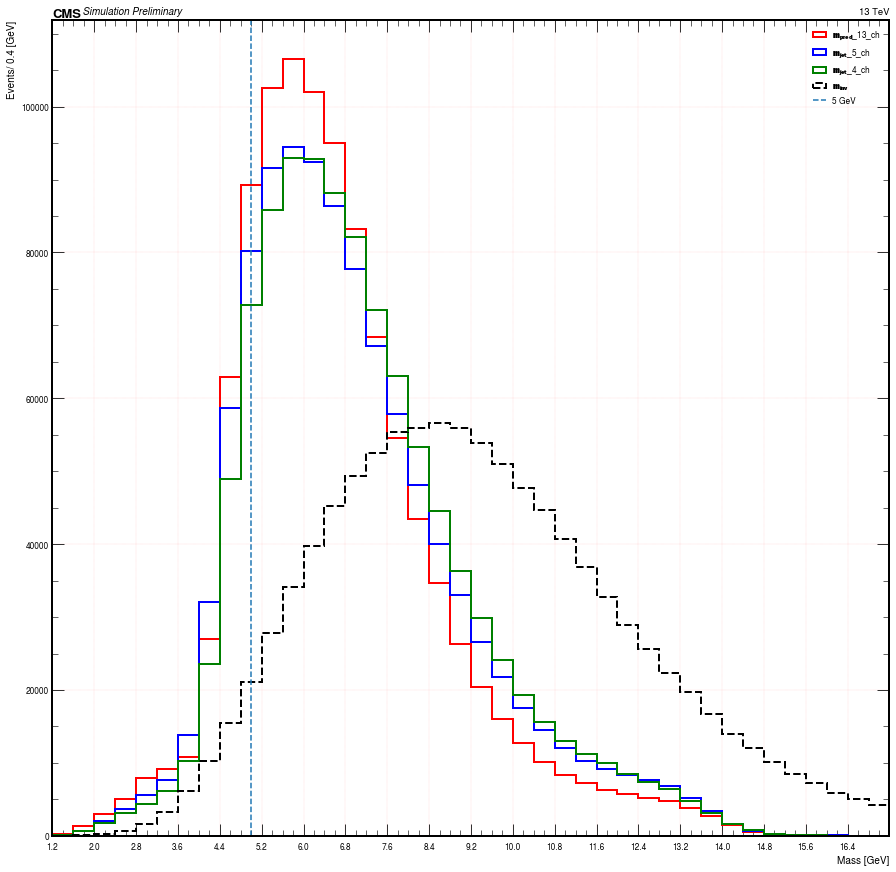

In [10]:
plot_3_model_for_massreg(mass='5')

# Signal Mass = 6 GeV

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9026_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.0835_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.1520_inference_data.pkl


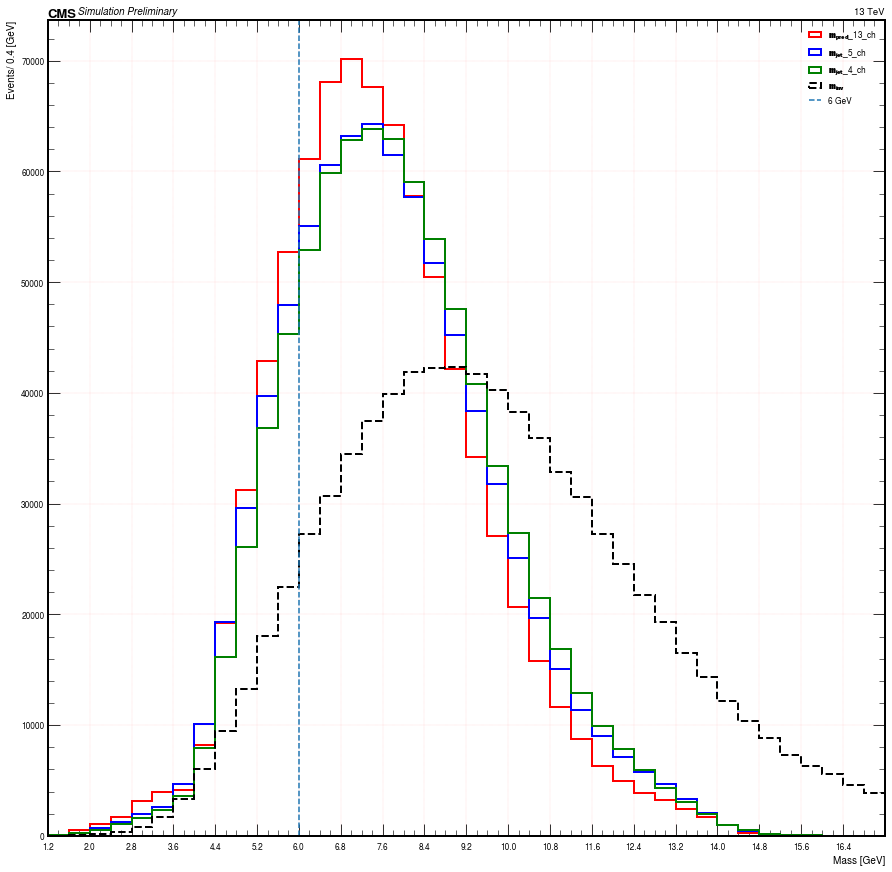

In [11]:
plot_3_model_for_massreg(mass='6')

# Signal Mass= 8 GeV

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9992_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.0779_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.1099_inference_data.pkl


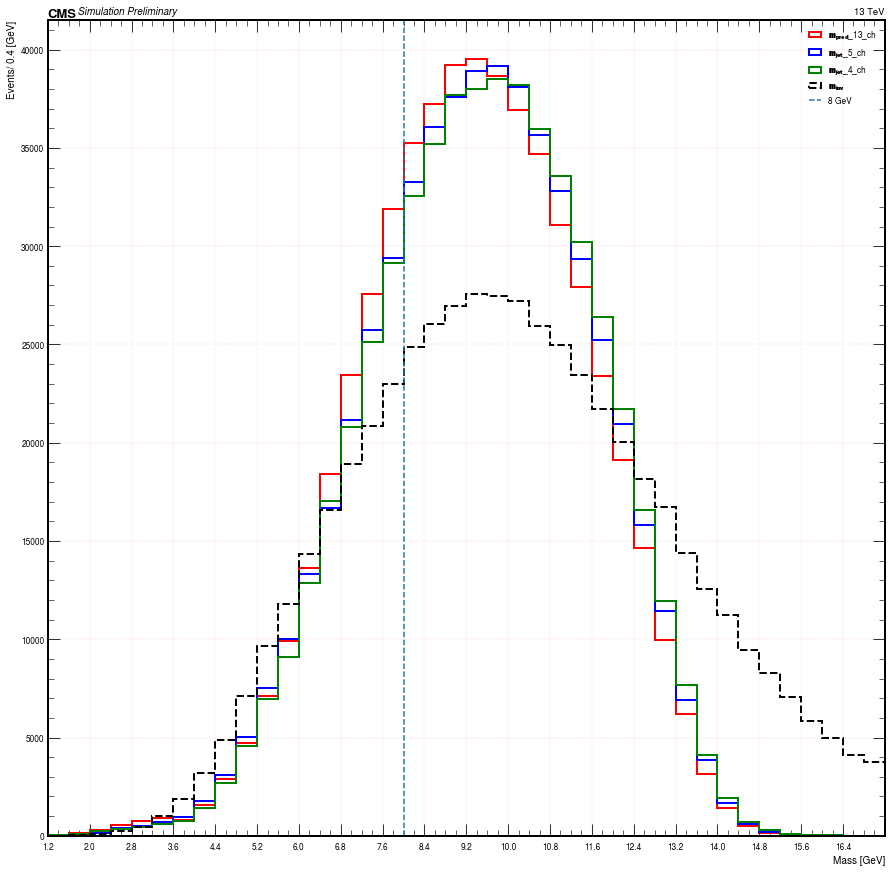

In [12]:
plot_3_model_for_massreg(mass='8')

# Signal Mass =10 Gev

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9033_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9139_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9324_inference_data.pkl


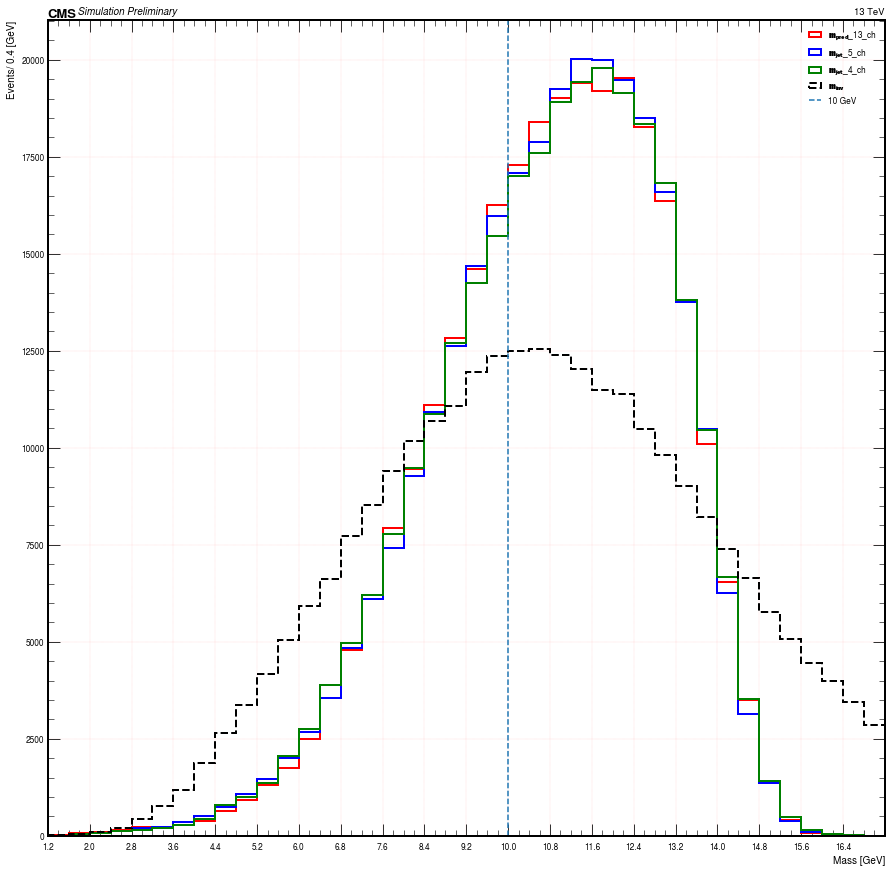

In [13]:
plot_3_model_for_massreg(mass='10')

# Signal M = 12 GeV

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7490_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7807_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7940_inference_data.pkl


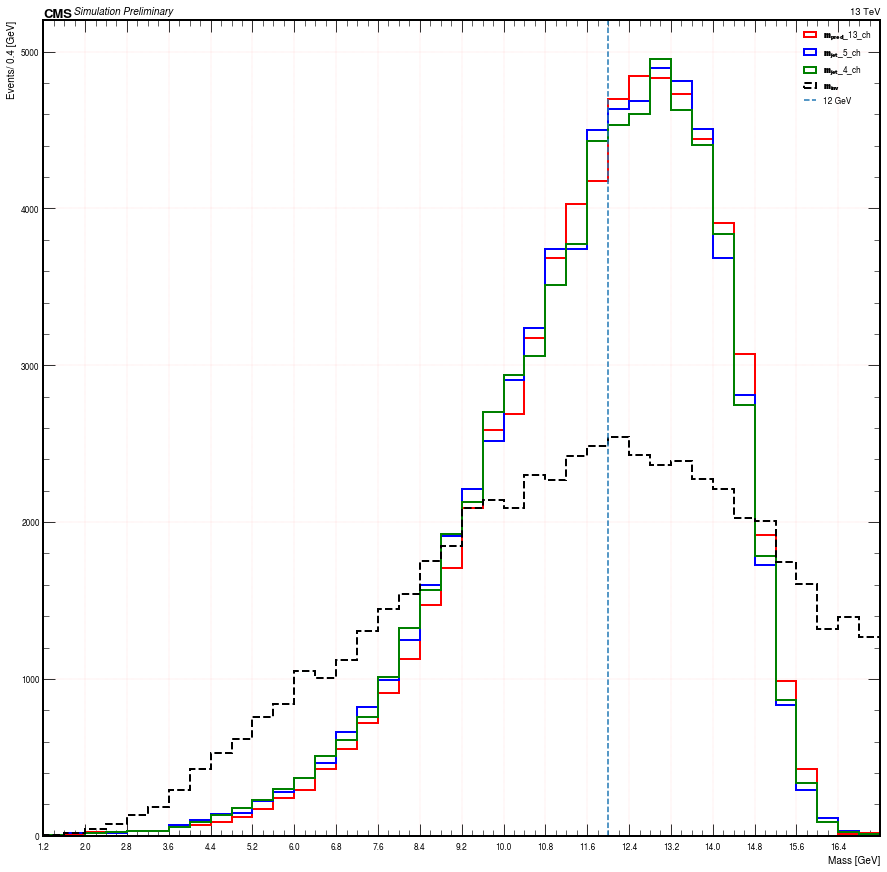

In [14]:
plot_3_model_for_massreg(mass='12')

# Signal M=14 GeV

loaded data file 1 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7863_inference_data.pkl
loaded data file 2 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9195_inference_data.pkl
loaded data file 3 ------>  /global/u1/b/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch/INFERENCE_DATA/INFERENCE_4_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9769_inference_data.pkl


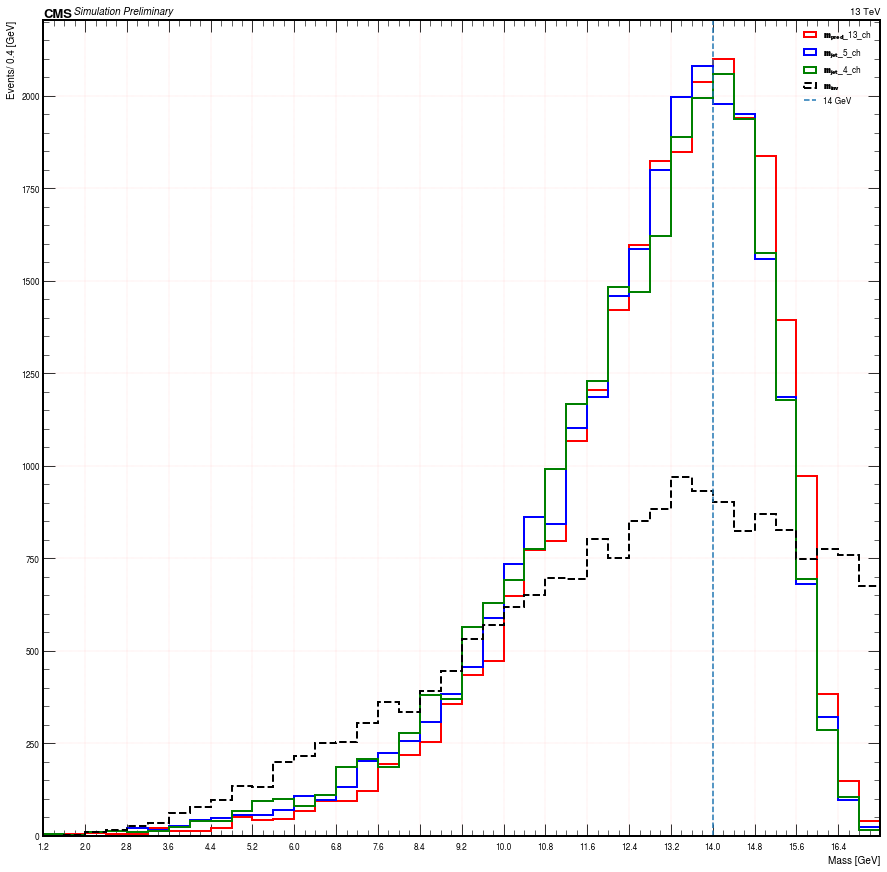

In [15]:
plot_3_model_for_massreg(mass='14')